In [11]:
# 데이터 준비
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['Y'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


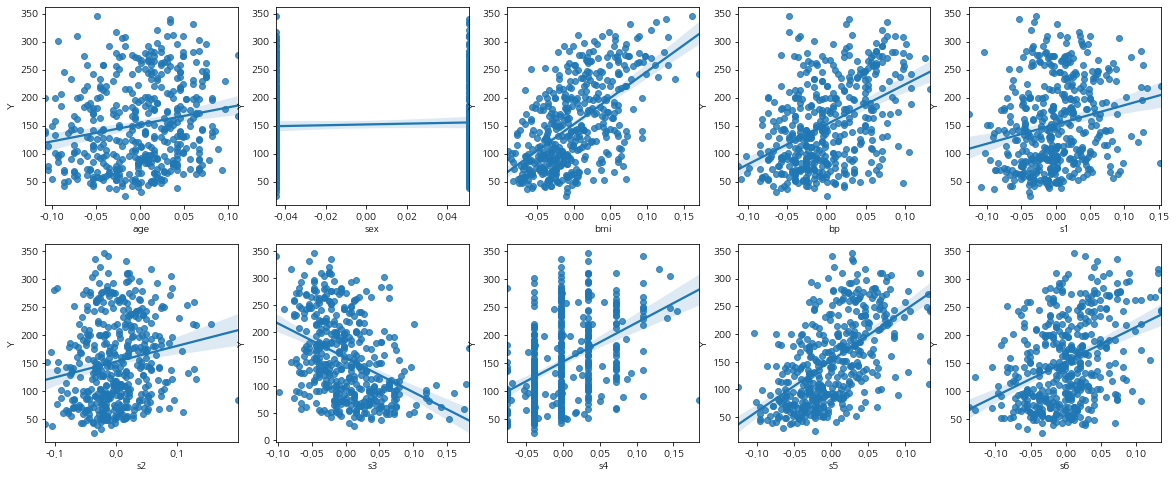

In [12]:
# 1. 각 칼럼이 회귀 결과에 미치는 영향을 시각화하여 확인하시오.
fig, axs = plt.subplots(figsize=(20,8), ncols=5, nrows=2)
features = diabetes.feature_names
for i, feature in enumerate(features):
    row = int(i/5)
    col = i%5
    sns.regplot(x=feature, y='Y', data=df, ax=axs[row][col])

In [13]:
# 2. 회귀 모델을 적합/예측 하시오.
from sklearn.model_selection import train_test_split

y_target = df['Y']
X_data = df.drop(['Y'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=12)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

In [14]:
# 3. 위에서 예측한 값을 이용하여 MAE, MSE, RMSE, R^2값을 계산하시오.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_preds)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3f}, R^2 : {3:.3f}'.format(mae,mse,rmse,r_squared))

MAE : 45.364, MSE : 3157.600, RMSE : 56.193, R^2 : 0.453


#### 구남이

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# 데이터 로드
housing_df = pd.read_csv('./data/housing.csv')
housing_df.drop(['ocean_proximity'], axis=1, inplace=True)
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [41]:
# Q1. 결측치 확인하고 결측치가 있는 행 삭제하기
housing_df = housing_df.dropna(axis=0)
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

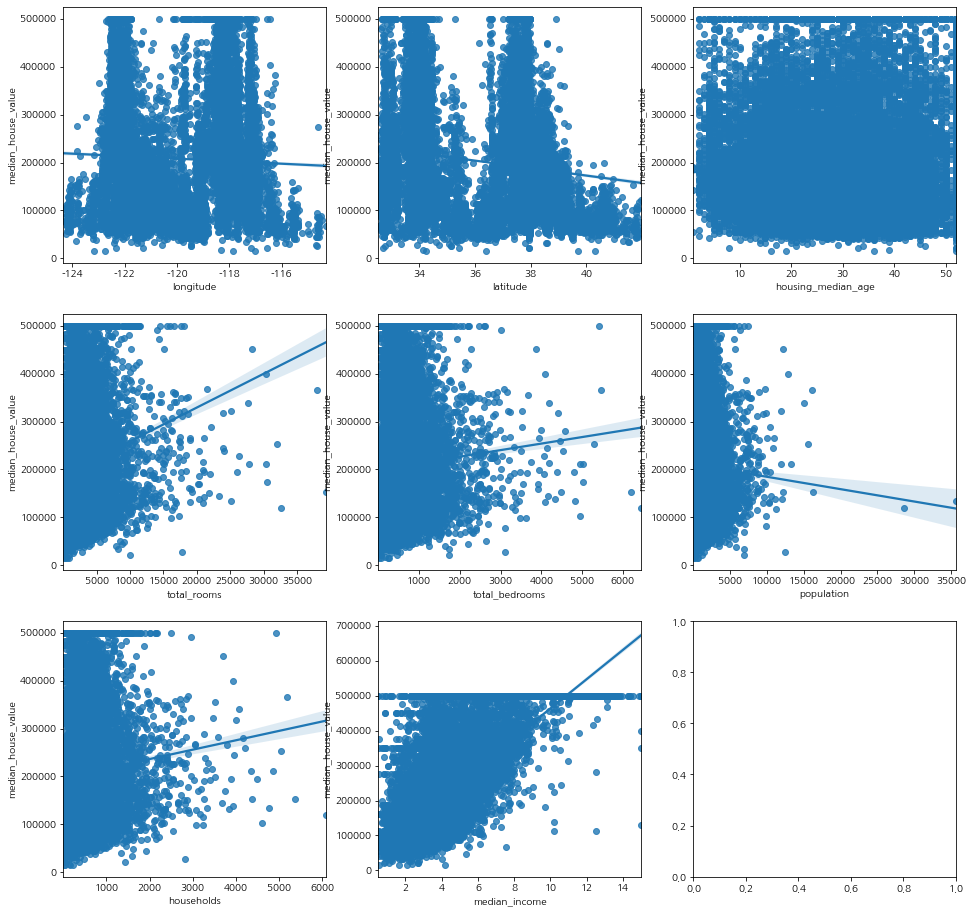

In [42]:
# 나머지 칼럼이 증가할수록 median_house_value 칼럼이 어떻게 변화하는지 알아보기
# Q2. 3개의 행과 3개의 열을 가진 subplots를 이용. axs는 3x3개의 ax를 가지도록 regplot 그리기

fig, axs = plt.subplots(figsize=(16,16) , ncols=3 , nrows=3)
lm_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
               'population','households','median_income']

for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='median_house_value',data=housing_df , ax=axs[row][col])

In [52]:
# Q3 영향도가 두드러지는 total_rooms, total_bedrooms, households, median_income 칼럼만 추출하여 X_data에 저장, 
# 'median_house_value'를 y_target에 저장
    
X_data = housing_df[['total_rooms','total_bedrooms', 'households', 'median_income']]
y_target = housing_df['median_house_value']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Q4. 선형 회귀 OLS 로 학습/예측 수행

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_preds, y_test)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 6328368698.231 , RMSE : 79551.045
Variance score : 0.522


In [54]:
# Q5. 절편 값, 회귀 계수값 확인하기
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 10854.516547417268
회귀 계수값: [-3.04000e+01  1.34200e+02  3.04000e+01  4.88578e+04]


In [55]:
# Q6. 칼럼명 별 회귀 계수값 확인하기
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

median_income     48857.8
total_bedrooms      134.2
households           30.4
total_rooms         -30.4
dtype: float64

#### 강수민

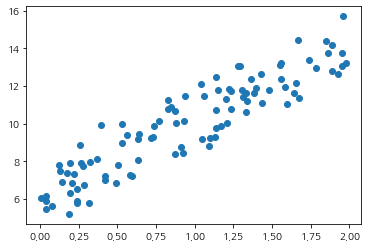

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [18]:
# Q1. w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환하는 함수 만들기

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [19]:
# Q2. 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용하기

def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [20]:
# Q3. 비용함수 만들고 계산하기

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


#### 박민영

In [21]:
# 모듈 및 데이터 불러오기

from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['y']= diabetes.target

y_target = df['y']
X_data = df.drop(['y'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, 
                                                    test_size = 0.3)


In [22]:
# 1. 학습 데이터를 이용하여 아래 alpha 값들을 이용해 릿지 회귀의 교차 검증을 수행하기 위한 코드를 완성하세요.

from sklearn.linear_model import Ridge

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
	  # scoring 값으로 mse를 사용 (단, scoring의 특성을 고려하여 적용)
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 54.073
alpha 0.1 일 때 5 folds 의 평균 RMSE : 54.173
alpha 1 일 때 5 folds 의 평균 RMSE : 58.828
alpha 10 일 때 5 folds 의 평균 RMSE : 71.278
alpha 100 일 때 5 folds 의 평균 RMSE : 75.828


In [23]:
# 2. 위에서 구한 최적의 alpha 값을 이용하여 학습 / 예측 / 평가를 수행하기 위한 코드를 작성하세요.

from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
mse = mean_squared_error(y_preds, y_test)
rmse = np.sqrt(mse)

print(rmse)

57.19679978964175


In [26]:
# 3. 회귀 계수와 절편 값을 출력하세요.
print(ridge.coef_)
print('\n',ridge.intercept_)

[ -14.33736462 -270.26972623  525.14870206  312.9757848  -954.79345126
  652.57395386  141.36834248  153.87016701  780.41531044   94.56562203]

 151.08083864039966
